In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

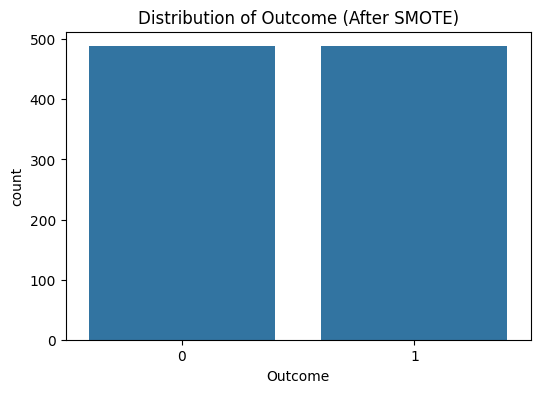

In [10]:
import seaborn as sns
X = data.drop('Outcome', axis=1)
y = data['Outcome']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)


plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_resampled)
plt.title('Distribution of Outcome (After SMOTE)')
plt.show()

In [11]:
X = data[['Glucose','BMI']].values
y = data[['Outcome']].values

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())

LogisticRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
print(y_pred)

[1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0]


In [51]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.8013245033112583

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.71      0.62      0.66        47

    accuracy                           0.80       151
   macro avg       0.77      0.75      0.76       151
weighted avg       0.80      0.80      0.80       151



In [28]:
confusion_matrix(y_test,y_pred)

array([[92, 12],
       [18, 29]])

<Axes: >

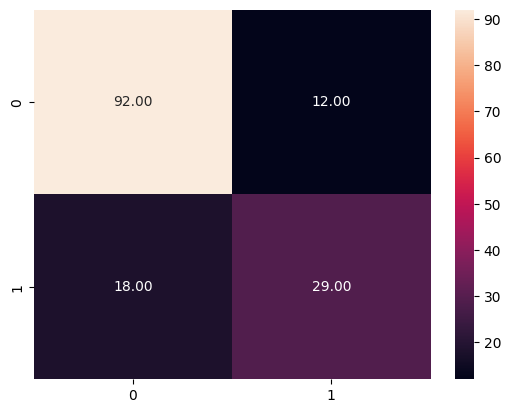

In [29]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt=".2f")

In [30]:
co=data.corr()
co

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125717,0.152768,-0.079145,-0.074400,0.018352,-0.029159,0.545238,0.213371
Glucose,0.125717,1.000000,0.138648,0.066949,0.328606,0.232771,0.133945,0.261490,0.494190
BloodPressure,0.152768,0.138648,1.000000,0.181638,0.072618,0.192729,0.019738,0.224820,0.050964
SkinThickness,-0.079145,0.066949,0.181638,1.000000,0.436029,0.383601,0.177912,-0.117976,0.069674
Insulin,-0.074400,0.328606,0.072618,0.436029,1.000000,0.186606,0.182338,-0.045947,0.130203
BMI,0.018352,0.232771,0.192729,0.383601,0.186606,1.000000,0.153683,0.022144,0.309884
DiabetesPedigreeFunction,-0.029159,0.133945,0.019738,0.177912,0.182338,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.224820,-0.117976,-0.045947,0.022144,0.031674,1.000000,0.232734
Outcome,0.213371,0.494190,0.050964,0.069674,0.130203,0.309884,0.178052,0.232734,1.000000


<Axes: >

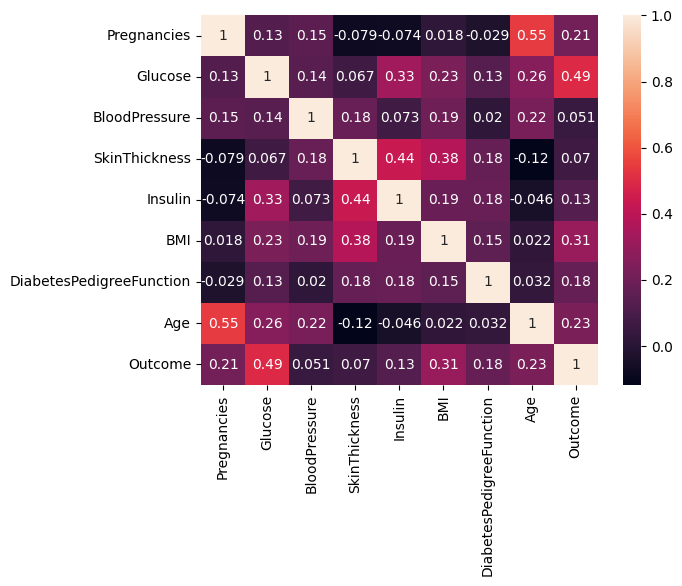

In [31]:
sns.heatmap(co,annot=True)

<Axes: >

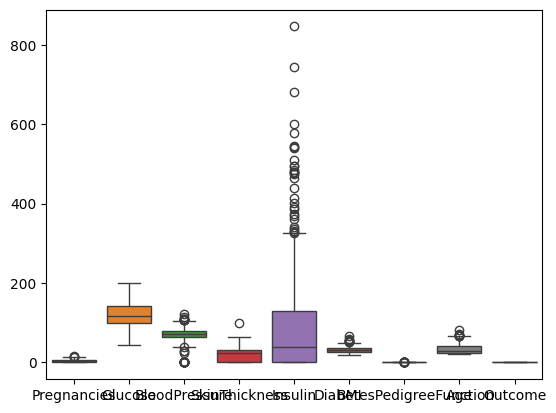

In [32]:
sns.boxplot(data)

<Axes: xlabel='Glucose'>

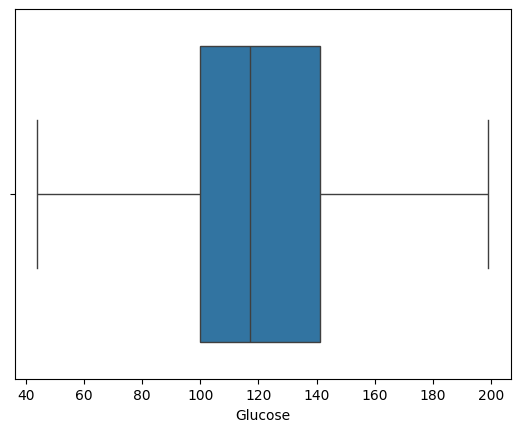

In [33]:
sns.boxplot(x=data['Glucose'])

<Axes: xlabel='BloodPressure'>

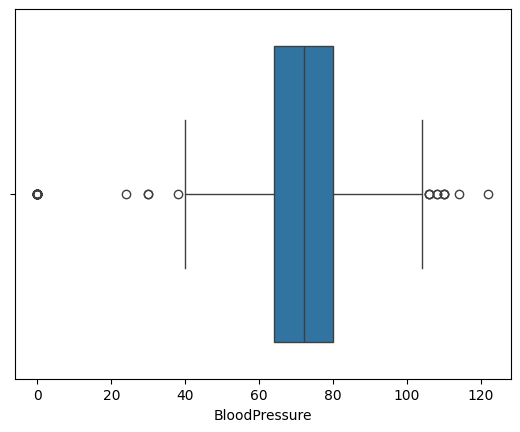

In [62]:
sns.boxplot(x=data['BloodPressure'])

<Axes: xlabel='Insulin'>

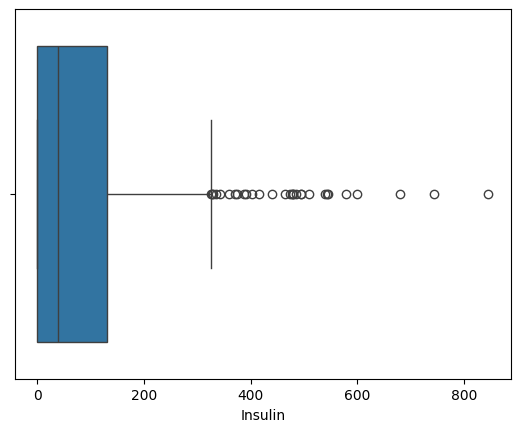

In [64]:
sns.boxplot(x=data['Insulin'])

In [34]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,69.704787,20.715426,81.348404,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,18.322255,15.930487,115.925034,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


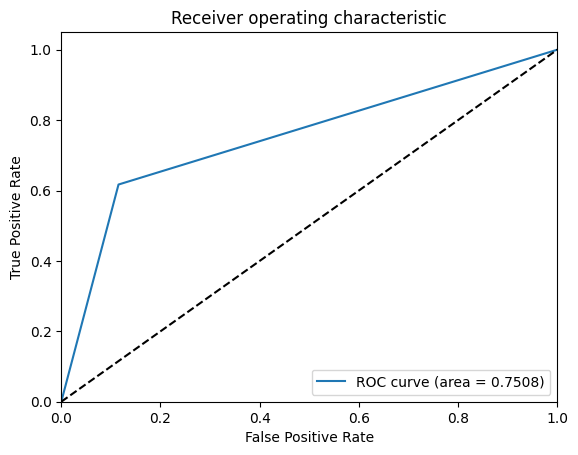

In [35]:
# Plot the ROC curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()


<Axes: xlabel='Age', ylabel='count'>

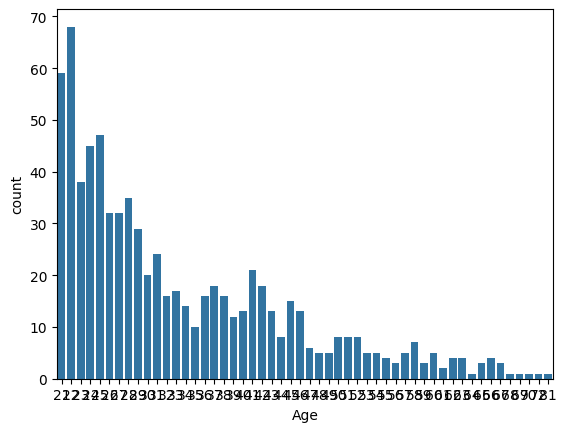

In [69]:
sns.countplot(x='Age',data=data)

Text(0.5, 1.0, 'Barplot')

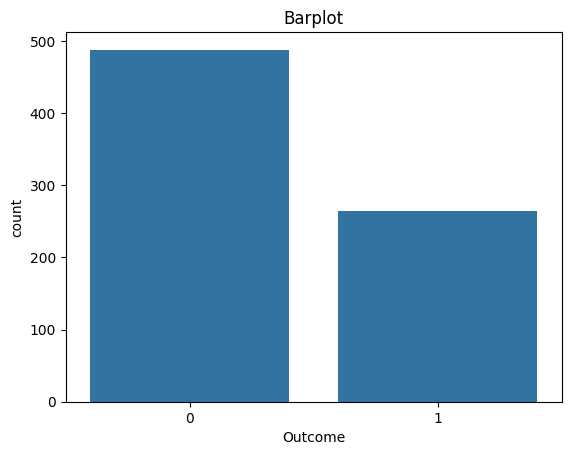

In [66]:
sns.countplot(x='Outcome',data=data)
plt.title('Barplot')

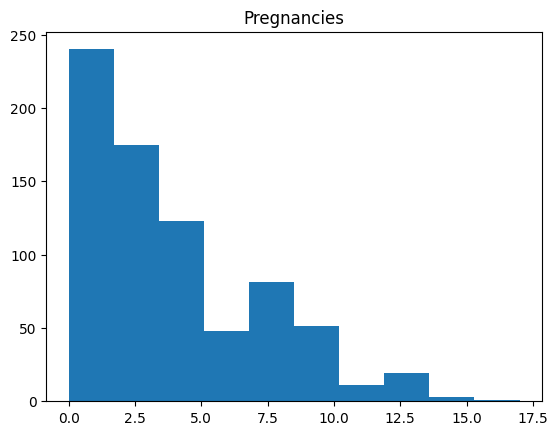

In [53]:
plt.hist(data['Pregnancies'], bins=10)
plt.title('Pregnancies')
plt.show()

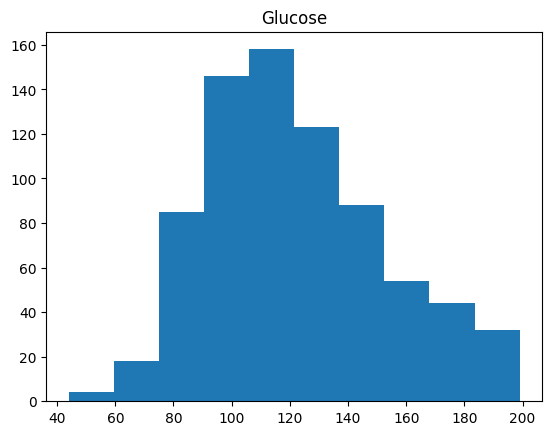

In [54]:
plt.hist(data['Glucose'], bins=10)
plt.title('Glucose')
plt.show()

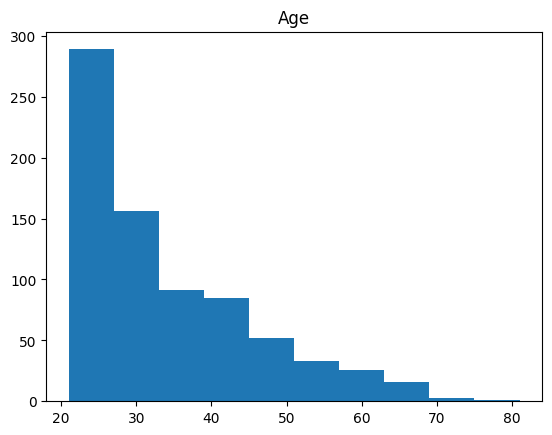

In [55]:
plt.hist(data['Age'], bins=10)
plt.title('Age')
plt.show()

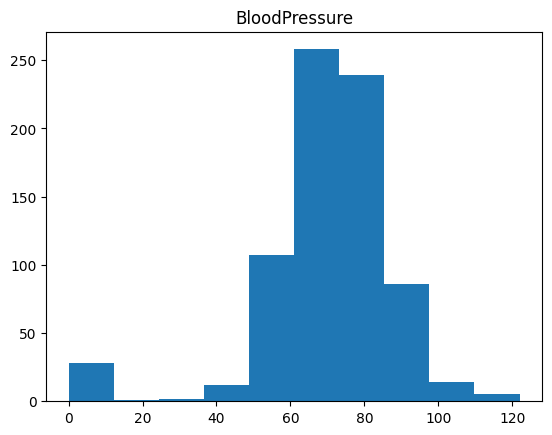

In [56]:
plt.hist(data['BloodPressure'], bins=10)
plt.title('BloodPressure')
plt.show()

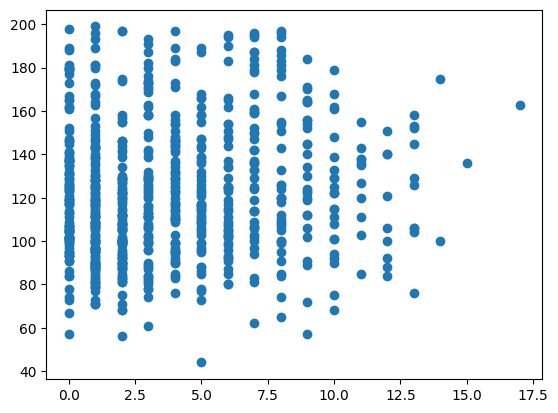

In [59]:

plt.scatter(x=data['Pregnancies'], y=data['Glucose'])
plt.show()

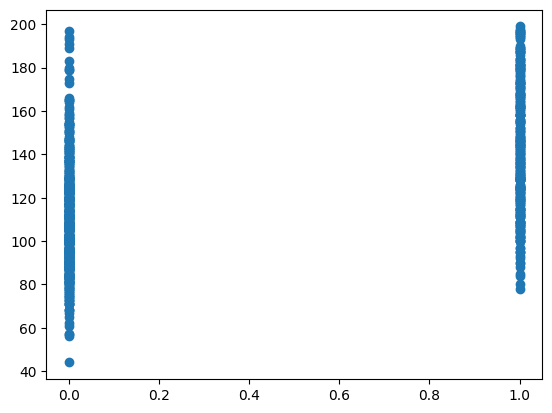

In [60]:

plt.scatter(x=data['Outcome'], y=data['Glucose'])
plt.show()

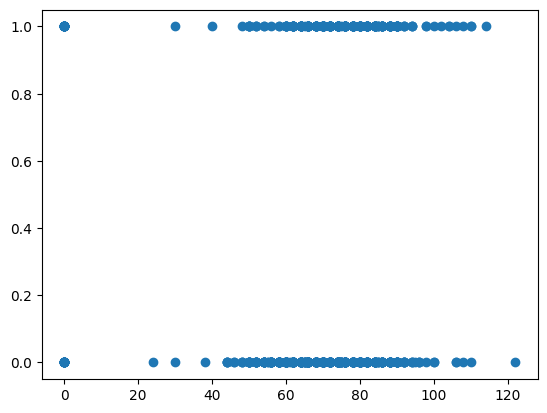

In [61]:

plt.scatter(x=data['BloodPressure'], y=data['Outcome'])
plt.show()